<a href="https://colab.research.google.com/github/saiful1604008/Thesis/blob/main/paper_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pymatreader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from glob import glob
import os
import mne 
import pymatreader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
all_file_path_normal = glob('/content/drive/MyDrive/Comparison_Dataset/Normal/*.set')
all_file_path_seizure = glob('/content/drive/MyDrive/Comparison_Dataset/Seizure/*.set')

In [ ]:
print(len(all_file_path_normal), len(all_file_path_seizure))

51 59


In [ ]:
n_file_path_normal = [i for i  in all_file_path_normal if 'chb' in i.split('\\')[0]]
n_file_path_seizure = [i for i  in all_file_path_seizure if 'chb' in i.split('\\')[0]]
print(len(n_file_path_normal), len(n_file_path_seizure))

51 59


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def read_data(file_path):
    data = mne.io.read_raw_eeglab(file_path, preload = True)
    data.set_eeg_reference()
    data.filter(l_freq = 0.5, h_freq = 70)
    epochs = mne.make_fixed_length_epochs(data , duration = 5)
    array = epochs.get_data()
    return array

In [ ]:
sample_data = read_data(n_file_path_normal[0])

Reading /content/drive/MyDrive/Comparison_Dataset/Normal/chbn1.fdt


<ipython-input-20-c7a064dc2830>:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data = mne.io.read_raw_eeglab(file_path, preload = True)


Reading 0 ... 10240  =      0.000 ...    40.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 70 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 70.00 Hz
- Upper transition bandwidth: 17.50 Hz (-6 dB cutoff frequency: 78.75 Hz)
- Filter length: 1691 samples (6.605 sec)

Not setting metadata
8 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8 events and 1280 original time points ...
0 bad epochs dropped


In [ ]:
sample_data.shape

(8, 23, 1280)

In [ ]:
%%capture
n_epochs_array_normal = [read_data(i) for i in n_file_path_normal]
n_epochs_array_seizure = [read_data(i) for i in n_file_path_seizure]

In [ ]:
n_epochs_array_seizure[0].shape

(8, 23, 1280)

In [ ]:
n_epochs_labels_normal = [len(i)*[0] for i in n_epochs_array_normal]
n_epochs_labels_seizure = [len(i)*[1] for i in n_epochs_array_seizure]
print(len(n_epochs_array_normal), len(n_epochs_labels_seizure))

51 59


In [ ]:
data_list = n_epochs_array_normal + n_epochs_array_seizure
label_list = n_epochs_labels_normal + n_epochs_labels_seizure

In [ ]:
group_list = [[i]*len(j) for i, j in enumerate(data_list)]
len(group_list)

110

In [ ]:
label_array = np.hstack(label_list)
group_array = np.hstack(group_list)
data_array = np.vstack(data_list)

In [ ]:
print(data_array.shape, label_array.shape, group_array.shape)

(2054, 23, 1280) (2054,) (2054,)


In [ ]:
df = pd.DataFrame.from_records(data_array)

In [ ]:
df.shape

(2054, 23)

In [ ]:
df[:3]

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,"[0.0, 2.6514332058844882e-05, 3.22260336938891...","[-1.6940658945086007e-21, -2.5073138643362218e...","[1.0164395367051604e-20, 1.3757020834860174e-0...","[-6.776263578034403e-21, 2.7070303204317542e-0...","[3.049318610115481e-20, 1.1138744230983685e-05...","[-9.317362419797304e-21, 6.697083865793598e-06...","[-1.2705494208814505e-21, -2.4076250696195717e...","[2.202285662861181e-20, 2.4283864258037506e-05...","[8.470329472543003e-21, 2.6135060698939086e-05...","[-2.498747194400186e-20, 5.1166747302417563e-0...",...,"[-8.470329472543003e-21, 0.0001075122013811500...","[-1.0164395367051604e-20, 6.48054578268139e-05...","[1.6940658945086007e-20, -0.000152272649553148...","[-1.0164395367051604e-20, 2.7061288213721542e-...","[-1.1011428314305904e-20, -6.731603142224687e-...","[-3.3881317890172014e-21, 6.7624893065937345e-...","[-5.082197683525802e-21, -9.248628330336092e-0...","[6.776263578034403e-21, 1.9077514164647694e-05...","[-1.3552527156068805e-20, 4.674706891286839e-0...","[-1.0164395367051604e-20, 6.48054578268139e-05..."
1,"[-2.1461134253210318e-05, -2.0762949376289276e...","[3.8048802592001423e-07, -4.942813513021333e-0...","[7.453729457257066e-06, 3.5419936721293577e-06...","[5.24874355487215e-06, 3.2307754597576977e-07,...","[-2.0602728230255026e-05, -2.655494821497807e-...","[1.584027556918459e-05, 1.3731648383467487e-05...","[6.990529638212117e-06, 4.9679299752038956e-06...","[-1.023523666613407e-05, -1.4099547796429032e-...","[-6.212269807596306e-05, -6.88160544363356e-05...","[4.229076060676051e-05, 4.828088850953827e-05,...",...,"[3.750938911159083e-05, 4.004917057791286e-05,...","[1.010571063239818e-05, 5.695628498740311e-06,...","[-2.426479489840244e-05, -9.461009783498853e-0...","[2.4654309097598162e-05, 2.9378954793625387e-0...","[2.5330612290221708e-05, 2.7051069087633044e-0...","[-8.08856701188487e-06, -8.181574451779146e-06...","[-1.7383407096619737e-05, -1.1171702129721343e...","[-3.0664183738531193e-06, -1.3435994112907263e...","[1.905183822956016e-05, 1.5092774488595644e-05...","[1.010571063239818e-05, 5.695628498740311e-06,..."
2,"[4.4585391055452717e-05, 4.867771395673363e-05...","[-4.8192297946277664e-05, -4.8781297172731734e...","[-1.8200869379880252e-05, -2.235911937939711e-...","[-3.2115836454801327e-06, -4.076419213738372e-...","[1.7668207790209438e-05, 2.6232232199970916e-0...","[-1.987449520147114e-05, -1.6037065790558984e-...","[-4.621876476282789e-05, -4.92874051987853e-05...","[2.3780564222968307e-05, 1.2927120492610135e-0...","[-1.8761157599831025e-05, -4.941919214601814e-...","[5.725048266945156e-05, 6.968941618954339e-05,...",...,"[3.4055793131139234e-05, 3.6241589589528946e-0...","[3.7726037754763655e-05, 3.249453638933958e-05...","[-4.927965071053791e-06, -7.831398452569496e-0...","[4.920649242429471e-05, 6.952010251566944e-05,...","[-7.062338255521978e-05, -7.902791486427444e-0...","[-2.42052603727796e-07, -3.888724913201463e-06...","[2.1909375343655347e-05, 1.487393290393401e-05...","[-6.248019486346058e-05, -6.609697580877147e-0...","[-2.1854767347408702e-05, -2.3506206446744494e...","[3.7726037754763655e-05, 3.249453638933958e-05..."


In [ ]:
from scipy import stats

In [ ]:
def mean(x):
    return np.mean(x ,axis = -1)

def var(x):
    return np.var(x ,axis = -1)
    
def skewness(x):
    return stats.skew(x, axis = -1)

def kurtosis(x):
    return stats.kurtosis(x, axis = -1)

def concatenate_features(x):
                   return np.concatenate((mean(x), var(x),skewness(x), kurtosis(x)), axis = -1)


In [ ]:
features  = []
for d in data_array:
    features.append(concatenate_features(d))

In [ ]:
features_array = np.array(features)
features_array.shape

(2054, 92)

In [ ]:
ft = pd.DataFrame(features_array)
lb = pd.DataFrame(label_array)

In [ ]:
ft.shape , lb.shape

((2054, 92), (2054, 1))

In [ ]:
ft.to_csv('features_array.csv')

In [ ]:
lb.to_csv('label_array.csv')

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dataset = pd.read_csv('/content/f.csv')
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
0,3.480000e-06,-2.760000e-06,1.710000e-06,3.530000e-08,1.550000e-06,1.220000e-06,-3.440000e-06,3.130000e-06,4.860000e-06,7.440000e-06,...,0.512859,4.090252,0.690657,-0.195263,-0.191765,-0.058543,-0.305525,0.951704,0.512859,0
1,3.850000e-07,2.760000e-07,1.170000e-06,-6.200000e-07,1.410000e-06,1.830000e-07,-4.680000e-07,1.560000e-07,-5.780000e-08,-9.860000e-07,...,0.331038,-0.088255,1.931439,0.339002,1.151491,-0.118454,0.681477,0.207673,0.331038,0
2,-1.060000e-06,-1.090000e-06,-2.720000e-06,1.330000e-06,-1.730000e-06,-2.090000e-06,-9.520000e-08,3.260000e-07,-1.590000e-06,-1.980000e-07,...,0.519422,0.600810,-0.210264,0.323296,0.227549,0.190816,-0.394961,-0.375067,0.519422,0
3,1.000000e-06,-1.720000e-08,9.620000e-07,-2.600000e-07,6.230000e-07,3.910000e-08,4.130000e-07,6.030000e-07,6.360000e-07,-2.670000e-07,...,0.295171,0.107639,-0.631112,0.059548,-0.226677,-0.057734,0.163947,0.448646,0.295171,0
4,-9.610000e-07,9.080000e-07,7.670000e-07,-3.810000e-07,-8.660000e-07,2.990000e-06,1.950000e-07,-1.950000e-06,2.100000e-07,2.220000e-06,...,-0.547782,0.408515,1.145653,0.908620,0.099177,0.214179,0.229707,0.429120,-0.547782,0


In [ ]:
X = dataset.iloc[:, 0:92].values
y = dataset.iloc[:, 92].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1643, 92), (411, 92), (1643,), (411,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier(n_estimators= 300, max_depth = 100, min_samples_split=3, random_state=1)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

0.8418491484184915

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[231  28]
 [ 37 115]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       259
           1       0.80      0.76      0.78       152

    accuracy                           0.84       411
   macro avg       0.83      0.82      0.83       411
weighted avg       0.84      0.84      0.84       411



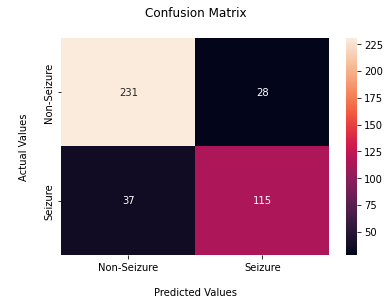

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(confusion_matrix(y_test,y_pred), fmt = '' ,annot=True)
ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('\nActual Values\n');
ax.xaxis.set_ticklabels(['Non-Seizure','Seizure'])
ax.yaxis.set_ticklabels(['Non-Seizure','Seizure'])
plt.show()

In [ ]:
TP = 231
FN = 29
FP = 37
TN = 115

Precision = TP / (TP + FP)
Sensitivity = TP / (TP + FN)
Specificity = TN /(TN + FP)
False_Pos_Rate = FP / (TN + FP)
False_Neg_Rate = FN / (FN + TP)
F1_Score = (2*Precision*Sensitivity) / (Precision + Sensitivity)
Accuracy = (TP+TN) / (TP+FP+TN+FN)

precision = "{:.2f}".format(Precision)
sensitivity = "{:.2f}".format(Sensitivity)
specificity = "{:.2f}".format(Specificity)
false_pos_rate = "{:.2f}".format(False_Pos_Rate)
false_neg_rate = "{:.2f}".format(False_Neg_Rate)
f1_score = "{:.2f}".format(F1_Score)
accuracy = "{:.2f}".format(Accuracy)

print("Precision          :", precision)
print("Sensitivity        :", sensitivity)
print("Specificity        :", specificity)
print("F1-Score           :", f1_score)
print("False Positive Rate:", false_pos_rate)
print("False Negative Rate:", false_neg_rate)
print("Accuraccy          :", accuracy)

Precision          : 0.86
Sensitivity        : 0.89
Specificity        : 0.76
F1-Score           : 0.88
False Positive Rate: 0.24
False Negative Rate: 0.11
Accuraccy          : 0.84
